In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [6]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [7]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
data['age'].count()

32561

In [9]:
data.shape

(32561, 15)

In [10]:
male_percentage = data[data['sex'] == 'Male'].shape[0] / data.shape[0] * 100
print('Male percentage : ',male_percentage)

Male percentage :  66.92054912318419


In [11]:
female_percentage = 100 - male_percentage
print('Female percentage : ', female_percentage)

Female percentage :  33.07945087681581


Text(0.5, 1.0, 'Sex Percentage')

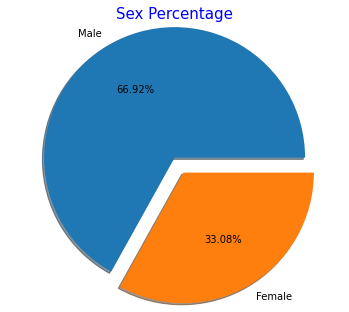

In [12]:
sex_vals = [male_percentage, female_percentage]
sex_labels = ['Male','Female']
plt.axis('equal')
plt.pie(sex_vals,labels=sex_labels, radius=1.5, autopct='%0.2f%%', shadow=True, explode=[0, 0.2])
plt.title('Sex Percentage', loc='center', pad=30, fontsize=15, color='blue')

In [13]:
salary_above_50k = data[data['salary']=='>50K'].shape[0] / data.shape[0] * 100
print('Percentage salary above 50K', salary_above_50k)
salary_below_or_50K = 100 - salary_above_50k
print('Percentage salary below or 50K', salary_below_or_50K)

Percentage salary above 50K 24.080955744602438
Percentage salary below or 50K 75.91904425539757


Text(0.5, 1.0, 'Salary Percentage')

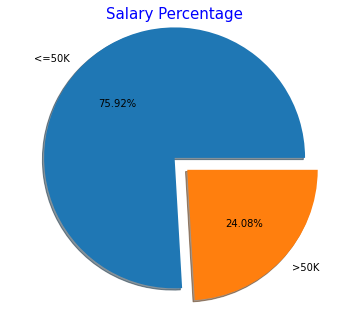

In [14]:
salary_vals = [salary_below_or_50K, salary_above_50k]
salary_label = ['<=50K', '>50K']
plt.axis('equal')
plt.pie(salary_vals, labels=salary_label, radius=1.5, autopct='%0.2f%%', shadow=True, explode=[0, 0.2])
plt.title('Salary Percentage', loc='center', pad=30, fontsize=15, color='blue')

In [15]:
higher_education = data[data['education'].isin(['Bachelors', 'Masters', 'Doctorate'])].shape[0]
lower_education = data[~data['education'].isin(['Bachelors', 'Masters', 'Doctorate'])].shape[0]
print('Sum of people who have higher education :', higher_education)
print('Sum of people who have lower education :', lower_education)

Sum of people who have higher education : 7491
Sum of people who have lower education : 25070


In [16]:
race_count = data.groupby('race')
race_count['race'].count()

race
Amer-Indian-Eskimo      311
Asian-Pac-Islander     1039
Black                  3124
Other                   271
White                 27816
Name: race, dtype: int64

In [17]:
#Amer-Indian-Eskimo people
male_amer_count = data[(data['race'] == 'Amer-Indian-Eskimo') & (data['sex'] == 'Male')].shape[0] / data[data['race'] == 'Amer-Indian-Eskimo'].shape[0] * 100
female_amer_count = data[(data['race'] == 'Amer-Indian-Eskimo') & (data['sex'] == 'Female')].shape[0] / data[data['race'] == 'Amer-Indian-Eskimo'].shape[0] * 100
#Asian-Pac_Islander people
male_asian_count = data[(data['race'] == 'Asian-Pac-Islander') & (data['sex'] == 'Male')].shape[0] / data[data['race'] == 'Asian-Pac-Islander'].shape[0] * 100
female_asian_count = data[(data['race'] == 'Asian-Pac-Islander') & (data['sex'] == 'Female')].shape[0] / data[data['race'] == 'Asian-Pac-Islander'].shape[0] * 100
#Black people
male_black_count = data[(data['race'] == 'Black') & (data['sex'] == 'Male')].shape[0] / data[data['race'] == 'Black'].shape[0] * 100
female_black_count = data[(data['race'] == 'Black') & (data['sex'] == 'Female')].shape[0] / data[data['race'] == 'Black'].shape[0] * 100
#Other people
male_other_count = data[(data['race'] == 'Other') & (data['sex'] == 'Male')].shape[0]/ data[data['race'] == 'Other'].shape[0] * 100
female_other_count = data[(data['race'] == 'Other') & (data['sex'] == 'Female')].shape[0]/ data[data['race'] == 'Other'].shape[0] * 100
#White people
male_white_count = data[(data['race'] == 'White') & (data['sex'] == 'Male')].shape[0]/ data[data['race'] == 'White'].shape[0] * 100
female_white_count = data[(data['race'] == 'White') & (data['sex'] == 'Female')].shape[0]/ data[data['race'] == 'White'].shape[0] * 100

In [18]:
#Amer-Indian-Eskimo Percentage
print('American, Indian, and Eskimo male percentage : ', male_amer_count,'\n',
      'American, Indian, and Eskimo female percentage : ', female_amer_count)
#Asian-Pac-Islander
print('Asian, Pacific, and Islander male percentage : ', male_asian_count,'\n',
      'Asian, Pacific, and Islander female percentage : ', female_asian_count)
#Black Percentage
print('Black male percentage : ', male_black_count,'\n',
      'Black female percentage : ', female_black_count)
#Other Percentage
print('Other male percentage : ', male_other_count,'\n',
      'Other female percentage : ', female_other_count)
#White Percentage
print('White male percentage : ', male_white_count,'\n',
      'White female percentage : ', female_white_count)

American, Indian, and Eskimo male percentage :  61.7363344051447 
 American, Indian, and Eskimo female percentage :  38.263665594855304
Asian, Pacific, and Islander male percentage :  66.69874879692011 
 Asian, Pacific, and Islander female percentage :  33.301251203079886
Black male percentage :  50.22407170294494 
 Black female percentage :  49.77592829705505
Other male percentage :  59.77859778597786 
 Other female percentage :  40.22140221402214
White male percentage :  68.93155018694277 
 White female percentage :  31.06844981305723


In [19]:
class_count = data.groupby('workclass')
class_count['workclass'].count()

workclass
?                    1836
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22696
Self-emp-inc         1116
Self-emp-not-inc     2541
State-gov            1298
Without-pay            14
Name: workclass, dtype: int64

In [20]:
min_work_hours = data['hours-per-week'].min()
max_work_hours = data['hours-per-week'].max()
print('Minimum work hours :', min_work_hours)
print('Maximum work hours :', max_work_hours)

Minimum work hours : 1
Maximum work hours : 99


In [21]:
education_count = data.groupby('education')
education_count['education'].count()

education
10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5355
Doctorate         413
HS-grad         10501
Masters          1723
Preschool          51
Prof-school       576
Some-college     7291
Name: education, dtype: int64

In [22]:
senior_high_school = data[data['education'].isin(['10th', '11th', '12th'])].shape[0]  / data.shape[0] * 100
junior_high_school = data[data['education'].isin(['7th-8th', '9th'])].shape[0]  / data.shape[0] * 100
primary_school = data[data['education'].isin(['1st-4th', '5th-6th'])].shape[0]  / data.shape[0] * 100
association_degree = data[data['education'].isin(['Assoc-acdm', 'Assoc-voc'])].shape[0]  / data.shape[0] * 100
university = data[data['education'].isin(['Bachelors', 'Masters', 'Doctorate'])].shape[0]  / data.shape[0] * 100
high_school_graduate = data[data['education'].isin(['HS-grad'])].shape[0]  / data.shape[0] * 100
college = data[data['education'].isin(['Some-college'])].shape[0]  / data.shape[0] * 100
professional_school = data[data['education'].isin(['Prof-school'])].shape[0]  / data.shape[0] * 100
preschool = data[data['education'].isin(['Preschool'])].shape[0]  / data.shape[0] * 100

([<matplotlib.patches.Wedge at 0x1d3294b4910>,
 [Text(3.2013218171227042, 0.8009610622334824, 'Senior High School'),
  Text(2.7194105399426958, 1.8694401074248346, 'Junior High School'),
  Text(2.386250686802563, 2.2794314334356054, 'Primary School'),
  Text(1.650183831344738, 2.8577776895287714, 'Association Degree'),
  Text(-1.3917940931276531, 2.992141240372014, 'University'),
  Text(-2.7226530834980496, -1.8647145054722352, 'High School Graduate'),
  Text(2.240571332106342, -2.4227752899811437, 'College'),
  Text(3.292941815029703, -0.215717877861078, 'Professional School'),
  Text(3.2999600486273692, -0.016238148393552483, 'Pre-School')],
 [Text(1.746175536612384, 0.436887852127354, '7.80%'),
  Text(1.4833148399687428, 1.0196946040499095, '3.56%'),
  Text(1.3015912837104886, 1.2433262364194209, '1.54%'),
  Text(0.9001002716425842, 1.5587878306520568, '7.52%'),
  Text(-0.7591604144332652, 1.6320770402029166, '23.01%'),
  Text(-1.485083500089845, -1.0171170029848553, '32.25%'),
  Te

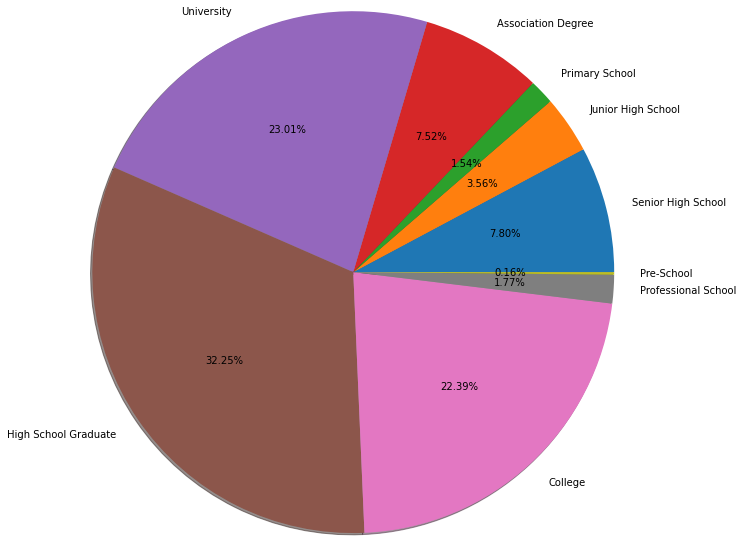

In [23]:
edu_vals = [senior_high_school, 
               junior_high_school, 
               primary_school, 
               association_degree, 
               university, 
               high_school_graduate, 
               college, professional_school, preschool]
edu_label = ['Senior High School', 
                'Junior High School', 
                'Primary School', 
                'Association Degree', 
                'University', 
                'High School Graduate', 'College', 'Professional School', 'Pre-School']
plt.axis('equal')
plt.pie(edu_vals, labels=edu_label, radius=3, autopct='%0.2f%%', shadow=True)

In [24]:
marital_stat_count = data.groupby('marital-status')
marital_stat_count['marital-status'].count()

marital-status
Divorced                  4443
Married-AF-spouse           23
Married-civ-spouse       14976
Married-spouse-absent      418
Never-married            10683
Separated                 1025
Widowed                    993
Name: marital-status, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

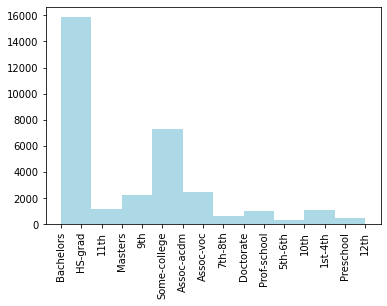

In [29]:
plt.hist(data['education'], color='lightblue')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

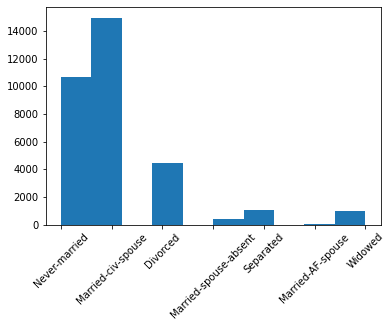

In [32]:
plt.hist(data['marital-status'])
plt.xticks(rotation= 45)

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

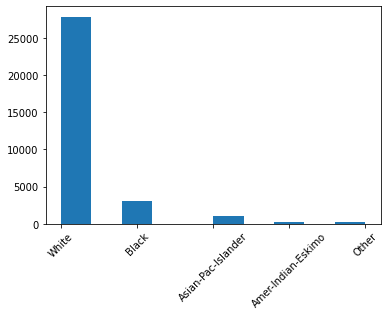

In [38]:
plt.hist(data['race'])
plt.xticks(rotation=45)

C:\Users\andhika\anaconda3\envs\gputest\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

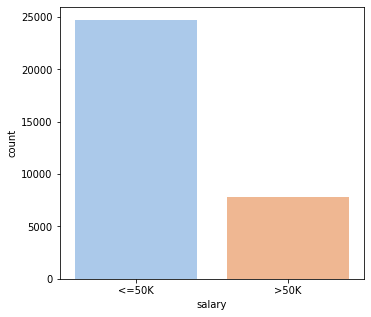

In [41]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1, 2, 1)
sns.countplot(data['salary'], palette = 'pastel')

C:\Users\andhika\anaconda3\envs\gputest\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Not-in-family'),
  Text(1, 0, 'Husband'),
  Text(2, 0, 'Wife'),
  Text(3, 0, 'Own-child'),
  Text(4, 0, 'Unmarried'),
  Text(5, 0, 'Other-relative')])

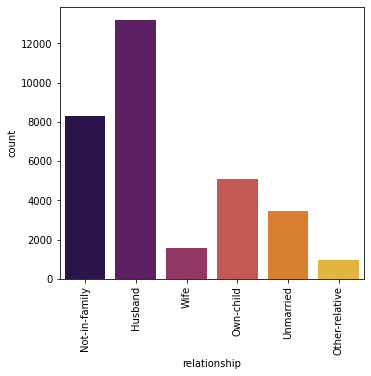

In [44]:
plt.subplot(1, 2, 2)
sns.countplot(data['relationship'], palette = 'inferno')
plt.xticks(rotation=90)

C:\Users\andhika\anaconda3\envs\gputest\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Asian-Pac-Islander'),
  Text(3, 0, 'Amer-Indian-Eskimo'),
  Text(4, 0, 'Other')])

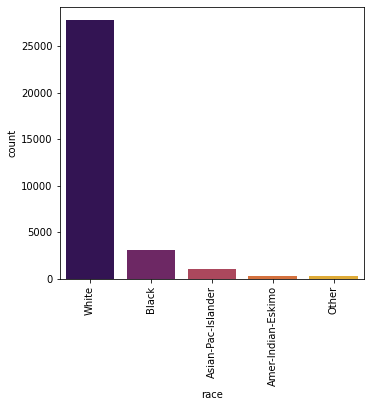

In [49]:
plt.subplot(1, 2, 2)
sns.countplot(data['race'], palette = 'inferno')
plt.xticks(rotation = 90)